In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.cluster import KMeans

In [14]:
# Load data from input file
input_file = '../aiwp-data/data_quality.txt'
X = np.loadtxt(input_file, delimiter=',')

([], [])

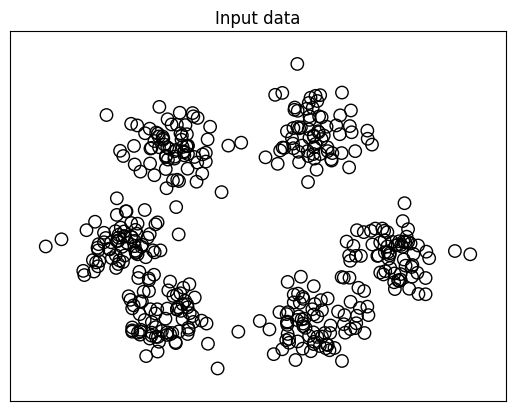

In [15]:
# Plot input data
plt.figure()
plt.scatter(X[:,0], X[:,1], color='black', s=80, marker='o', facecolors='none')
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
plt.title('Input data')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

In [16]:
# Initialize variables
scores = []
values = np.arange(2, 10)

# Iterate through the defined range
for num_clusters in values:
    # Train the KMeans clustering model
    kmeans = KMeans(init='k-means++', n_clusters=num_clusters, n_init=10)
    kmeans.fit(X)
    score = metrics.silhouette_score(X, kmeans.labels_, metric='euclidean', sample_size=len(X))

    print("cluster number =", num_clusters, " | Silhouette score =", score)
                    
    scores.append(score)

cluster number = 2  | Silhouette score = 0.47762624870454473
cluster number = 3  | Silhouette score = 0.5471742411734872
cluster number = 4  | Silhouette score = 0.579480188968759
cluster number = 5  | Silhouette score = 0.5890032635647954
cluster number = 6  | Silhouette score = 0.6096904118954452
cluster number = 7  | Silhouette score = 0.5538191872249804
cluster number = 8  | Silhouette score = 0.49702278393409277
cluster number = 9  | Silhouette score = 0.47841684200837936


Optimal number of clusters = 6


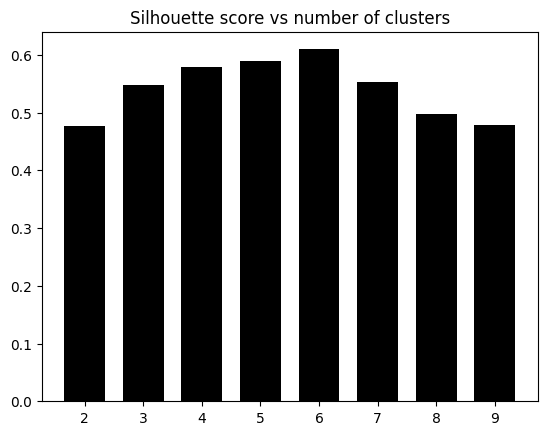

In [17]:

# Plot silhouette scores
plt.figure()
plt.bar(values, scores, width=0.7, color='black', align='center')
plt.title('Silhouette score vs number of clusters')

# Extract best score and optimal number of clusters
num_clusters = np.argmax(scores) + values[0]
print('Optimal number of clusters =', num_clusters)

plt.show()